<a href="https://colab.research.google.com/github/Mahesh1717/SMS--Spam-prediction/blob/main/sms_sapmdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded=files.upload()

In [ ]:
dataset=pd.read_csv("/spam.csv",encoding='latin1')

In [ ]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
dataset1=dataset.drop(['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'],axis=1)

In [ ]:
dataset1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
dataset1['label']=dataset1['v1'].map({'ham':0,'spam':1})

In [ ]:
dataset1

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


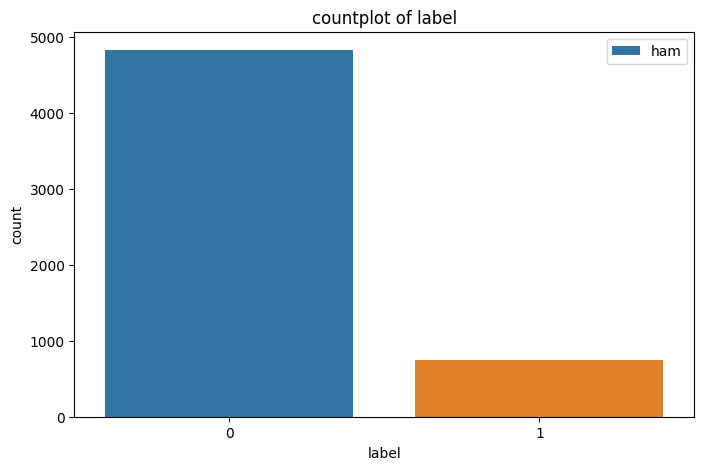

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='label',data=dataset1)
plt.xlabel('label')
plt.ylabel('count')
plt.title('countplot of label')
plt.legend(labels=["ham","spam"])

In [ ]:
dataset1.shape

(5572, 3)

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
 2   label   5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


In [ ]:
dataset1.value_counts(subset='label')

label
0    4825
1     747
dtype: int64

In [ ]:
count=round(4825/747)

In [ ]:
count

6

In [ ]:
only_spam=dataset1[dataset1['label']==1]

In [ ]:
only_spam

,v1,v2,label
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1


In [ ]:
for i in range(0,5):
  dataset1=pd.concat([dataset1,only_spam])

In [ ]:
dataset1.shape

(9307, 3)

In [ ]:
dataset1.value_counts(subset='label')

label
0    4825
1    4482
dtype: int64

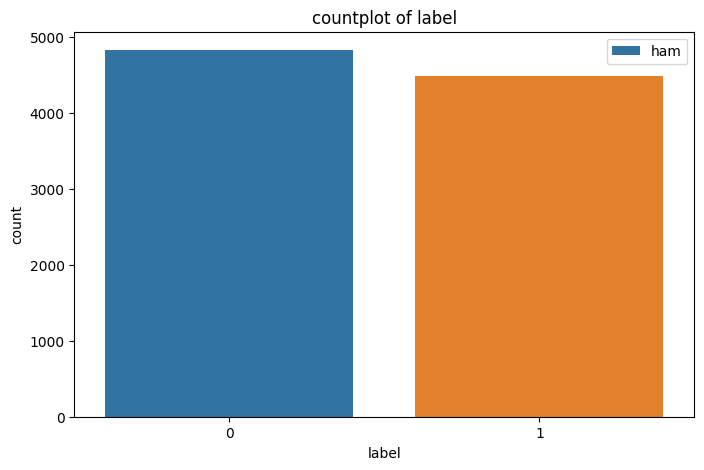

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='label',data=dataset1)
plt.xlabel('label')
plt.ylabel('count')
plt.title('countplot of label')
plt.legend(labels=["ham","spam"])

In [ ]:
dataset1['word_count']=dataset1['v2'].apply(lambda x:len(x.split()))

In [ ]:
dataset1

,v1,v2,label,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",0,20
1,ham,Ok lar... Joking wif u oni...,0,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,28
3,ham,U dun say so early hor... U c already then say...,0,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,13
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1,16
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,33
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1,28
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1,28


In [ ]:
def currency(data):
  cs=['$','€','£','¥','₣','₹']
  for i in cs:
    if i in data:
      return 1
  return 0

In [ ]:
dataset1['currency_symbol']=dataset1['v2'].apply(currency)

In [ ]:
dataset1

,v1,v2,label,word_count,currency_symbol
0,ham,"Go until jurong point, crazy.. Available only ...",0,20,0
1,ham,Ok lar... Joking wif u oni...,0,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,28,0
3,ham,U dun say so early hor... U c already then say...,0,11,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,13,0
...,...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1,16,0
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,33,1
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1,28,0
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1,28,0


In [ ]:
dataset1.value_counts(subset='currency_symbol')

currency_symbol
0    7747
1    1560
dtype: int64

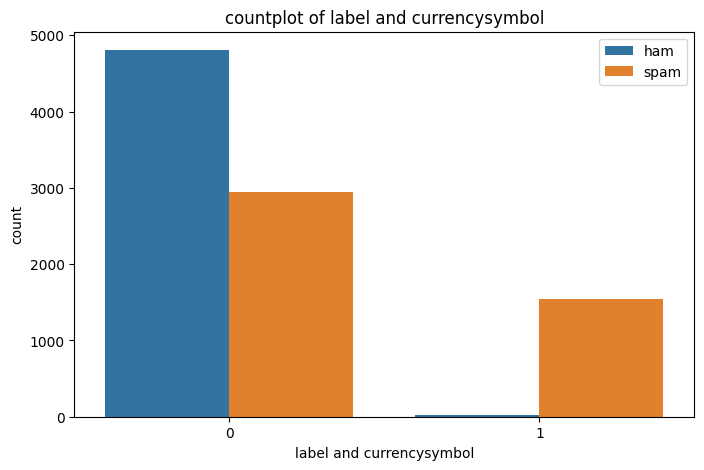

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='currency_symbol',data=dataset1,hue='label')
plt.xlabel('label and currencysymbol')
plt.ylabel('count')
plt.title('countplot of label and currencysymbol')
plt.legend(labels=["ham","spam"])

In [ ]:
def number(data):
  for i in data:
    if ord(i)>=48 and ord(i)<=57:
      return 1
  return 0

In [ ]:
dataset1['numbers']=dataset1['v2'].apply(number)

In [ ]:
dataset1.value_counts(subset='numbers')

numbers
1    4996
0    4311
dtype: int64

In [ ]:
dataset1

,v1,v2,label,word_count,currency_symbol,numbers
0,ham,"Go until jurong point, crazy.. Available only ...",0,20,0,0
1,ham,Ok lar... Joking wif u oni...,0,6,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,28,0,1
3,ham,U dun say so early hor... U c already then say...,0,11,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,13,0,0
...,...,...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,1,16,0,1
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1,33,1,1
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,1,28,0,1
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,1,28,0,1


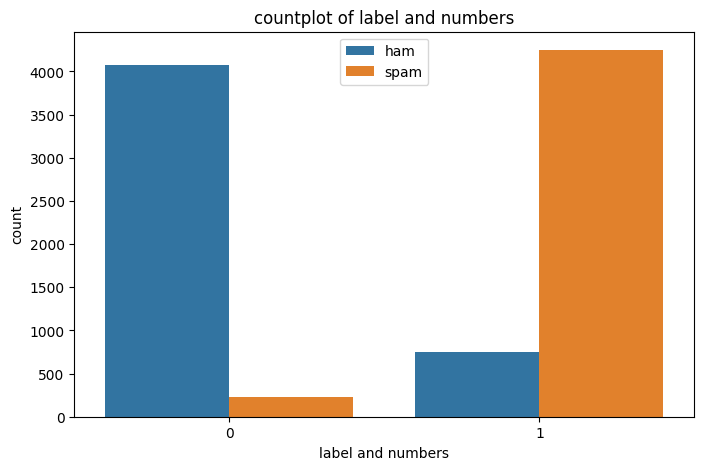

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='numbers',data=dataset1,hue='label')
plt.xlabel('label and numbers')
plt.ylabel('count')
plt.title('countplot of label and numbers')
plt.legend(labels=["ham","spam"])

In [ ]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()
stop_words=set(stopwords.words('english'))

In [ ]:
words=[]

In [ ]:
def data_clean(v2):
  v2=v2.lower()
  v2=re.sub(r"https\S + |www\S",repl=' ',string=v2)
  v2=v2.split(" ")
  v2=[word for word in v2 if word not in stop_words]
  v2=[lem.lemmatize(word) for word in v2]
  v2=" ".join(v2)
  return v2

In [ ]:
dataset1['v2']=dataset['v2'].apply(data_clean)

In [ ]:
dataset1['v2']

0       go jurong point, crazy.. available bugis n gre...
1                           ok lar... joking wif u oni...
2       free entry 2 wkly comp win fa cup final tkts 2...
3               u dun say early hor... u c already say...
4                    nah think go usf, life around though
                              ...                        
5537    want explicit sex 30 secs? ring 02073162414 no...
5540    asked 3mobile 0870 chatlines inclu free mins. ...
5547    contract mobile 11 mnths? latest motorola, nok...
5566    reminder o2: get 2.50 pound free call credit d...
5567    2nd time tried 2 contact u. u å£750 pound priz...
Name: v2, Length: 9307, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

tfidf=TfidfVectorizer()
from sklearn.metrics import classification_report,confusion_matrix


In [ ]:
words=np.array(dataset1['v2'])

In [ ]:
labels=np.array(dataset1['label'])

In [ ]:
words

array(['go jurong point, crazy.. available bugis n great world la e buffet... cine got amore wat...',
       'ok lar... joking wif u oni...',
       "free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question(std txt rate)t&c's apply 08452810075over18's",
       ...,
       'contract mobile 11 mnths? latest motorola, nokia etc. free! double min & text orange tariffs. text yes callback, remove records.',
       'reminder o2: get 2.50 pound free call credit detail great offer pls reply 2 text valid name, house postcode',
       '2nd time tried 2 contact u. u å£750 pound prize. 2 claim easy, call 087187272008 now1! 10p per minute. bt-national-rate.'],
      dtype=object)

In [ ]:
words= tfidf.fit_transform(words)

In [ ]:
words

<9307x8383 sparse matrix of type '<class 'numpy.float64'>'
	with 111622 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(words,labels,test_size=0.2,random_state=42)

In [ ]:
mnb=MultinomialNB()

In [ ]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred=mnb.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       958
           1       0.98      0.99      0.98       904

    accuracy                           0.98      1862
   macro avg       0.98      0.99      0.98      1862
weighted avg       0.99      0.98      0.98      1862



In [ ]:
cm=confusion_matrix(y_test,y_pred)

In [ ]:
cm

array([[939,  19],
       [  9, 895]])

<Axes: >

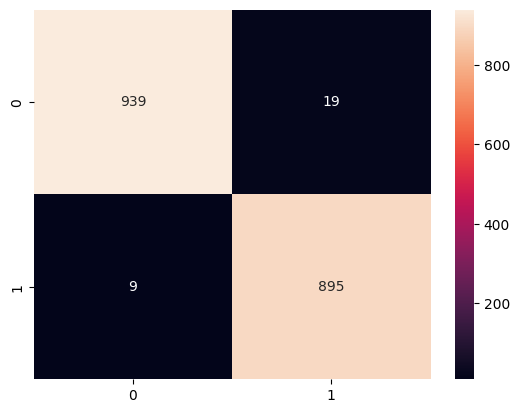

In [ ]:
sns.heatmap(cm,annot=True,fmt='g')

In [ ]:
  from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc=DecisionTreeClassifier()

In [ ]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred1=dtc.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       958
           1       0.97      1.00      0.99       904

    accuracy                           0.99      1862
   macro avg       0.99      0.99      0.99      1862
weighted avg       0.99      0.99      0.99      1862



In [ ]:
cm1=confusion_matrix(y_test,y_pred1)

In [ ]:
cm1

array([[933,  25],
       [  0, 904]])

<Axes: >

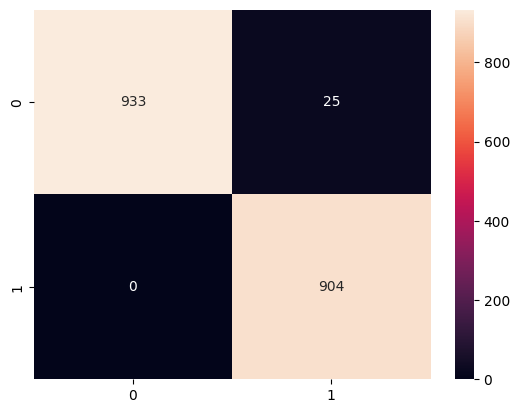

In [ ]:
sns.heatmap(cm1,annot=True,fmt='g')

In [ ]:
sample='Congratulations, you’ve won…!'

In [ ]:
s1=[data_clean(sample)]

In [ ]:
s2=tfidf.transform(s1).toarray()

In [ ]:
print(mnb.predict(s2))

[1]


In [ ]:
print(dtc.predict(s2))

[0]


In [ ]:
sample1=' Verify or update your account'

In [ ]:
ss1=[data_clean(sample1)]

In [ ]:
ss2=tfidf.transform(ss1).toarray()

In [ ]:
print(mnb.predict(ss2))

[1]


In [ ]:
print(dtc.predict(ss2))

[0]
